In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import NullFormatter
from matplotlib.ticker import StrMethodFormatter

conDir = ['./3d/3dcon/', './3d/3dint/', './3d/3ddis/']
varDir = ['0.5/', '1/', '2/']
stCon = ['HCS', 'ICS', 'LCS']

nseeds = 128
lc = 16
con = [2, 1, 3]
varSim = [0.5, 1, 2] 
scales = np.array([1,2,4,8,16,32,64,128,256]) 
scaleAtt = np.linspace(1,256,1000)

linestyle = ['dashed', 'dotted', 'dashdot']
marker = ['^', 'o', 's', '^']
color = ['red', 'darkgreen', 'navy']
scale_col = ["black","green","navy","purple","red"]

In [27]:
k_05 = np.array([])
kg_05 = np.array([])
var_05 = np.array([])
for ivar in range(len(varDir)):
    rdir = varDir[ivar]
    k1 = np.array([])
    kg1 = np.array([])
    var1 = np.array([])
    for iseed in range(nseeds):
        aux = np.load('./3d_256L_128r/3dcon/'+rdir+str(iseed)+'/k.npy').reshape(-1)
        k1 = np.append(k1, np.mean(aux))
        kg1 = np.append(kg1, np.exp(np.mean(np.log(aux))))
        var1 = np.append(var1, np.var(np.log(aux)))
        #print(k1, k1.shape)
    k_05 = np.append(k_05, np.mean(k1))
    kg_05 = np.append(kg_05, np.mean(kg1))
    var_05 = np.append(var_05, np.mean(var1))
k_05 = np.reshape(k_05, (1,len(varDir)))
kg_05 = np.reshape(kg_05, (1,len(varDir)))
var_05 = np.reshape(var_05, (1,len(varDir)))
print(k_05, k_05.shape)
print(kg_05, kg_05.shape)
print(var_05, var_05.shape)

k_1 = np.array([])
kg_1 = np.array([])
var_1 = np.array([])
for ivar in range(len(varDir)):
    rdir = varDir[ivar]
    k1 = np.array([])
    kg1 = np.array([])
    var1 = np.array([])
    for iseed in range(nseeds):
        aux = np.load('./3d_256L_128r/3dint/'+rdir+str(iseed)+'/k.npy').reshape(-1)
        k1 = np.append(k1, np.mean(aux))
        kg1 = np.append(kg1, np.exp(np.mean(np.log(aux))))
        var1 = np.append(var1, np.var(np.log(aux)))
        #print(k1, k1.shape)
    k_1 = np.append(k_1, np.mean(k1))
    kg_1 = np.append(kg_1, np.mean(kg1))
    var_1 = np.append(var_1, np.mean(var1))
k_1 = np.reshape(k_1, (1,len(varDir)))
kg_1 = np.reshape(kg_1, (1,len(varDir)))
var_1 = np.reshape(var_1, (1,len(varDir)))
print(k_1, k_1.shape)
print(kg_1, kg_1.shape)
print(var_1, var_1.shape)

k_2 = np.array([])
kg_2 = np.array([])
var_2 = np.array([])
for ivar in range(len(varDir)):
    rdir = varDir[ivar]
    k1 = np.array([])
    kg1 = np.array([])
    var1 = np.array([])
    for iseed in range(nseeds):
        aux = np.load('./3d_256L_128r/3ddis/'+rdir+str(iseed)+'/k.npy').reshape(-1)
        k1 = np.append(k1, np.mean(aux))
        kg1 = np.append(kg1, np.exp(np.mean(np.log(aux))))
        var1 = np.append(var1, np.var(np.log(aux)))
        #print(k1, k1.shape)
    k_2 = np.append(k_2, np.mean(k1))
    kg_2 = np.append(kg_2, np.mean(kg1))
    var_2 = np.append(var_2, np.mean(var1))
k_2 = np.reshape(k_2, (1,len(varDir)))
kg_2 = np.reshape(kg_2, (1,len(varDir)))
var_2 = np.reshape(var_2, (1,len(varDir)))
print(k_2, k_2.shape)
print(kg_2, kg_2.shape)
print(var_2, var_2.shape)

[[1.30545618 1.6834693  2.787084  ]] (1, 3)
[[1.02168354 1.03083426 1.04394775]] (1, 3)
[[0.48987861 0.97975722 1.95951443]] (1, 3)
[[1.27600733 1.62878823 2.65592613]] (1, 3)
[[0.99990254 0.99989306 0.99991055]] (1, 3)
[[0.48733629 0.97467257 1.94934514]] (1, 3)
[[1.2507993  1.58485182 2.56064046]] (1, 3)
[[0.97888048 0.97029386 0.95830883]] (1, 3)
[[0.48987861 0.97975722 1.95951443]] (1, 3)


In [9]:
kFG = np.array([[1.30545618, 1.6834693,  2.787084], [1.27600733, 1.62878823, 2.65592613], [1.2507993,  1.58485182, 2.56064046]])
kgFG = np.array([[1.02168354, 1.03083426, 1.04394775], [0.99990254, 0.99989306, 0.99991055], [0.97888048, 0.97029386, 0.95830883]])
varFG = np.array([[0.48987861, 0.97975722, 1.95951443], [0.48733629, 0.97467257, 1.94934514], [0.48987861, 0.97975722, 1.95951443]])

In [8]:
### Attinger functions ###
def attinger_amean(variance, scale, a, lc, Kg): 
    keff_scale = Kg * np.exp((variance/6)+(variance/3)*(erf((lc*a)/(np.sqrt(2)*scale)))**3)
    return keff_scale

def attinger_var(variance, scale, a, lc, Kg): #Attinger (Eq. 3.2.3, Boschan & Noetinger 2012)
    var_scale = Kg**2 * variance * (erf ((lc*a)/(np.sqrt(2)*scale)))**3
    return var_scale

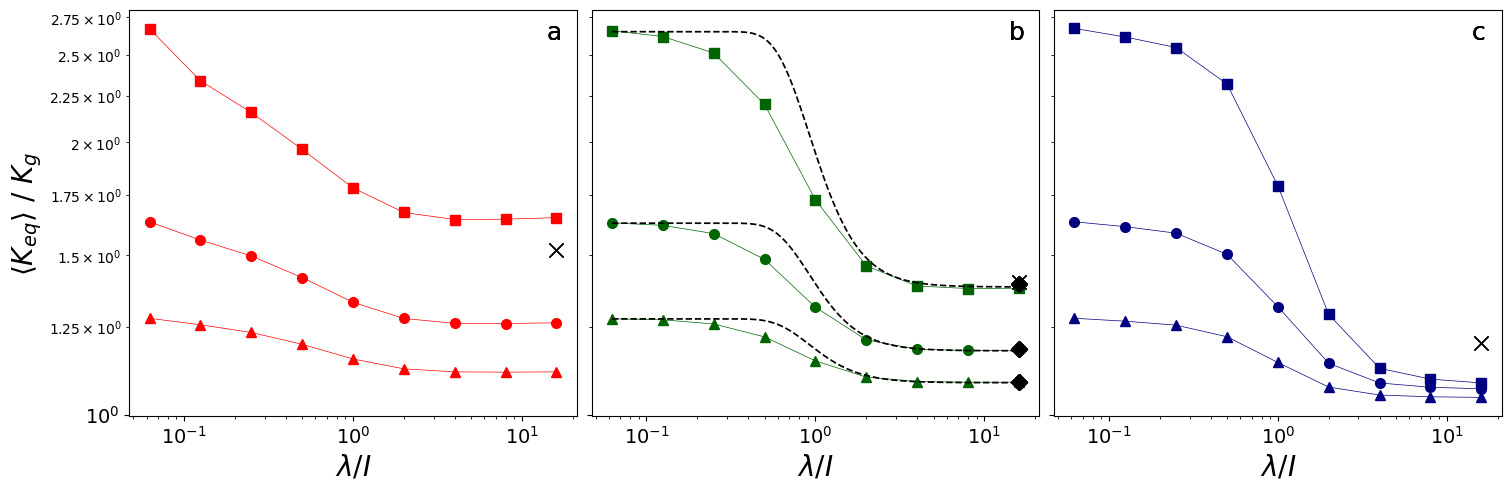

In [15]:
### Arithmetic mean ###

fig, ax = plt.subplots(1, 3, layout = 'constrained', sharey = True)
fig.set_figwidth(15)
num = ['a', 'b', 'c']


janko = [1.52, 1.4, 1.2] # estructuras de conectividad
matheron = [ 1.087, 1.181, 1.396]
gutjahr = [1.083, 1.167, 1.333]

for icon in range(len(conDir)):
    rdir1 = conDir[icon]
    for ivar in range(len(varDir)):
        rdir2 = varDir[ivar]
        keff = np.zeros(len(scales))
        for iscale in range(len(scales)):
            scale = scales[iscale]
            aux = np.array([])
            for iseed in range(nseeds):
                if scale == scales[0]:
                    aux = kFG[icon][ivar]
                    #aux = np.mean(np.load(rdir1+rdir2+str(iseed)+'/k.npy').reshape(-1))
                    
                if scale == scales[-1]:
                    aux = np.append(aux, np.loadtxt(rdir1+rdir2+str(iseed)+'/SolverRes.txt')[0])
                else:
                    try:
                        aux = np.append(aux, np.mean(np.load(rdir1+rdir2+str(iseed)+'/KpostProcess/Kperm'+str(scale)+'.npy').reshape(-1)))
                    except:
                        pass
            keff[iscale] = np.nanmean(aux)
        ax[icon].loglog(scales/lc, keff/kgFG[icon][ivar], color=color[icon], marker=marker[ivar], markersize=7, fillstyle='full', 
            linewidth=0.5, linestyle='-') #label=r'$\sigma^2_{Y}$'+' = '+str(varSim[ivar]), 
        
        if icon == 1:
            ax[1].loglog(scaleAtt/lc, attinger_amean(varFG[icon][ivar], scaleAtt, 1.3, lc, kgFG[icon][ivar]), label='Attinger', 
                color='black', linewidth=1.25, linestyle='--')
        
        #ax[icon].set_title(num[icon], fontsize=18, loc='left', weight='bold')
        #ax[icon].set_title(stCon[icon], fontsize=16, loc='center')
        
        ax[icon].set_xlabel(r'$\lambda/I$', fontsize=20)
        ax[0].set_ylabel(r'$⟨K_{eq}⟩ \ / \ K_{g}$', fontsize=20)
        
        ax[icon].get_yaxis().set_major_formatter(ScalarFormatter())
        ax[icon].yaxis.set_minor_formatter(NullFormatter())
        ax[icon].set_yticks(ticks=np.arange(1,3,0.25), labels=np.arange(1,3,0.25))
        ax[0].get_yaxis().set_major_formatter(StrMethodFormatter('{x:,.2f}'))
        ax[icon].tick_params(axis='both', labelsize=14)
        
        ax[icon].loglog(max(scales)/lc, janko[icon], marker='x',markersize=10, color='black', fillstyle='full')
        ax[1].loglog(max(scales)/lc, matheron[ivar], marker='D', markersize=8, color='black', fillstyle='full')
        ax[icon].text(14, 2.6, num[icon], style='normal', fontsize=18)
        #ax[1].text(20, 2.55, 'b', style='normal', fontsize=22)
        
        #ax[icon].loglog(max(scales)/lc, matheron[ivar]/kg_FG[icon][ivar], marker='X', markersize=5, color='darkgreen')
#plt.savefig('2D_arMean_'+stCon[icon]+'.png', format='png', dpi=300, bbox_inches='tight', )

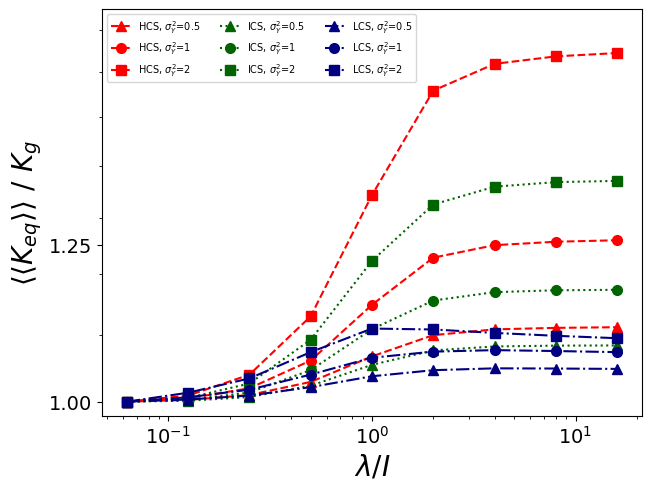

In [10]:
## Geometric mean ###
fig, ax = plt.subplots(1,1,layout="constrained")
# fig.set_figwidth(5)
# fig.set_figheight(5)
for icon in range(len(conDir)):
    rdir1=conDir[icon]
    for ivar in range(len(varDir)):
        rdir2=varDir[ivar]
        keff = np.zeros(len(scales))
        for iscale in range(len(scales)):
            scale = scales[iscale]
            aux = np.array([])
            for iseed in range(nseeds):
                if scale == scales[0]:
                    aux = kgFG[icon][ivar]
                elif scale == scales[-1]:
                    aux = np.append(aux, np.loadtxt(rdir1+rdir2+str(iseed)+'/SolverRes.txt')[0])
                else:
                    try:
                        aux = np.append(aux, np.load(rdir1+rdir2+str(iseed)+'/KpostProcess/Kperm'+str(scale)+'.npy').reshape(-1))
                        
                        
                    except:
                        pass
      
            keff[iscale] = np.exp(np.mean(np.log(aux)))
        ax.loglog(scales/lc, keff/kgFG[icon][ivar], label=stCon[icon]+', '+r'$\sigma^2_{Y}$'+'='+str(varSim[ivar]), color=color[icon], 
                  marker=marker[ivar], markersize=7, fillstyle='full', linewidth=1.5, linestyle=linestyle[icon])
        ax.set_xlabel(r'$\lambda / I$', fontsize=20)
        ax.set_ylabel(r'$⟨⟨K_{eq}⟩⟩ \ / \ K_{g}$', fontsize=20)
        ax.get_yaxis().set_major_formatter(ScalarFormatter())
        ax.yaxis.set_minor_formatter(NullFormatter())
        ax.set_yticks(ticks=np.arange(0.75,1.5,0.25), labels=np.arange(0.75,1.5,0.25))
        ax.tick_params(axis='both', labelsize=14)
        ax.get_yaxis().set_major_formatter(StrMethodFormatter('{x:,.2f}'))
        ax.set_ylim(0.98, 1.75)
        ax.legend(loc='upper left', fontsize=7, ncol=3)
#plt.show()
#plt.savefig('2D_geoMean_allVar.png', format='png', dpi=300, bbox_inches='tight', )
#plt.close()

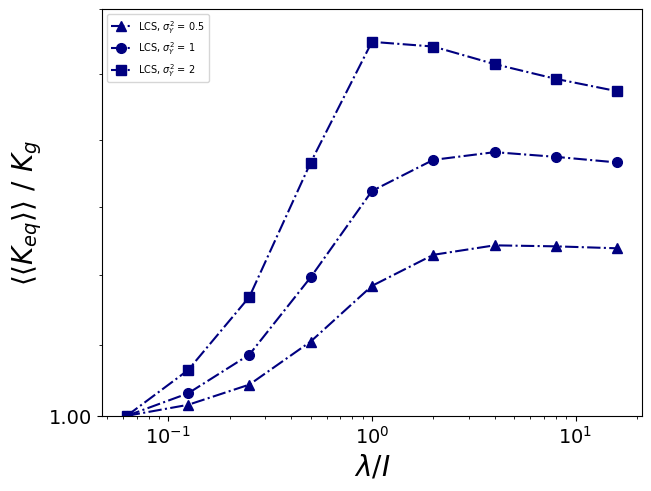

In [11]:
## Geometric mean ###
fig, ax = plt.subplots(1,1,layout="constrained")
# fig.set_figwidth(5)
# fig.set_figheight(5)
for icon in range(len(conDir)):
    rdir1=conDir[icon]
    for ivar in range(len(varDir)):
        rdir2=varDir[ivar]
        keff = np.zeros(len(scales))
        for iscale in range(len(scales)):
            scale = scales[iscale]
            aux = np.array([])
            for iseed in range(nseeds):
                if scale == scales[0]:
                    aux = kgFG[icon][ivar]
                elif scale == scales[-1]:
                    aux = np.append(aux, np.loadtxt(rdir1+rdir2+str(iseed)+'/SolverRes.txt')[0])
                else:
                    try:
                        aux = np.append(aux, np.load(rdir1+rdir2+str(iseed)+'/KpostProcess/Kperm'+str(scale)+'.npy').reshape(-1))
                    except:
                        pass
            keff[iscale] = np.exp(np.mean(np.log(aux)))
        
        if icon == 2:

            ax.loglog(scales/lc, keff/kgFG[icon][ivar], label=stCon[icon]+', '+r'$\sigma^2_{Y}$'+' = '+str(varSim[ivar]), color=color[icon], 
                      marker=marker[ivar], markersize=7, fillstyle='full', linewidth=1.5, linestyle=linestyle[icon])
            ax.set_xlabel(r'$\lambda / I$', fontsize=20)
            ax.set_ylabel(r'$⟨⟨K_{eq}⟩⟩ \ / \ K_{g}$', fontsize=20)
            ax.get_yaxis().set_major_formatter(ScalarFormatter())
            ax.yaxis.set_minor_formatter(NullFormatter())
            ax.set_yticks(ticks=np.arange(0.75,1.5,0.25), labels=np.arange(0.75,1.5,0.25))
            ax.tick_params(axis='both', labelsize=14)
            ax.get_yaxis().set_major_formatter(StrMethodFormatter('{x:,.2f}'))
            ax.set_ylim(1, 1.12)
            ax.legend(loc='upper left', fontsize=7)
#plt.show()
#plt.savefig('2D_geoMean_allVar.png', format='png', dpi=300, bbox_inches='tight', )
#plt.close()

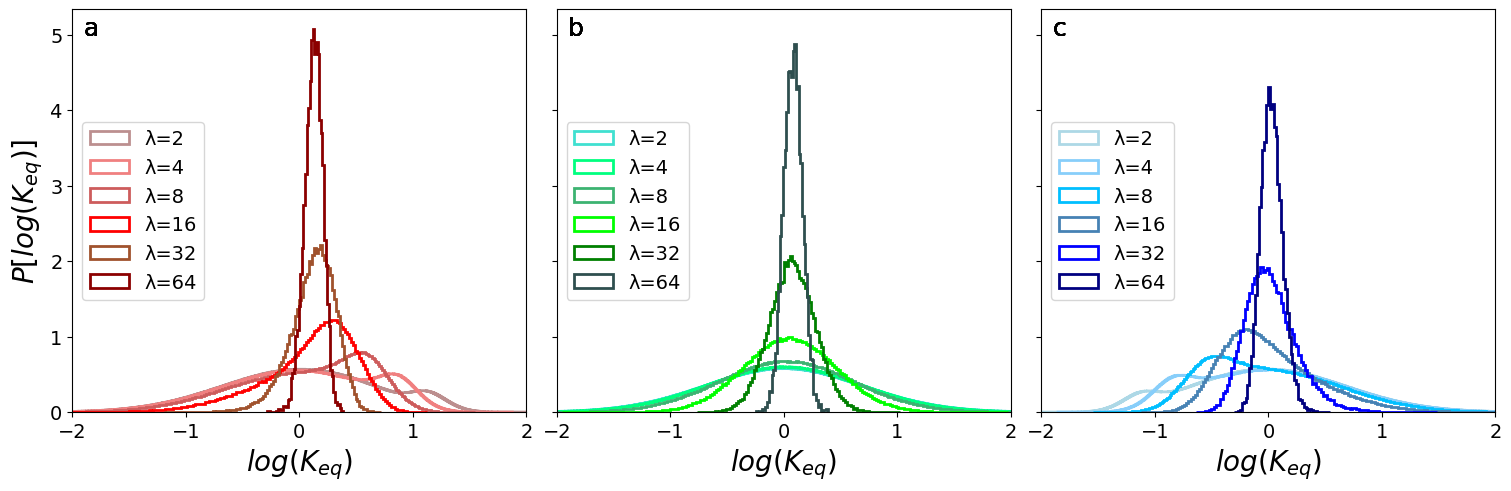

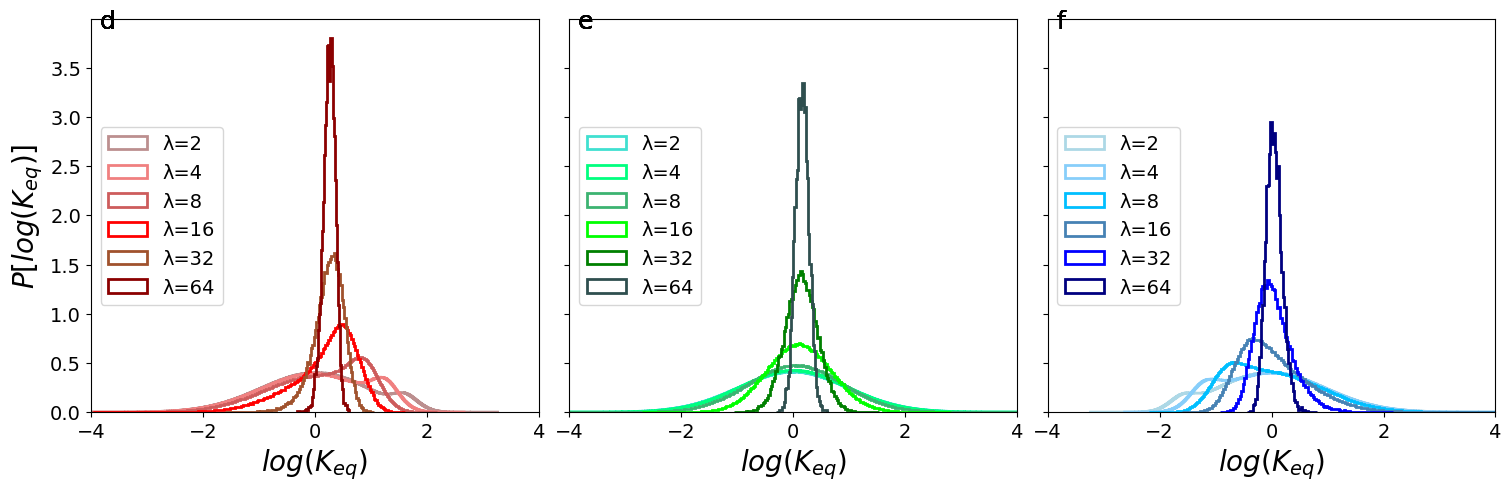

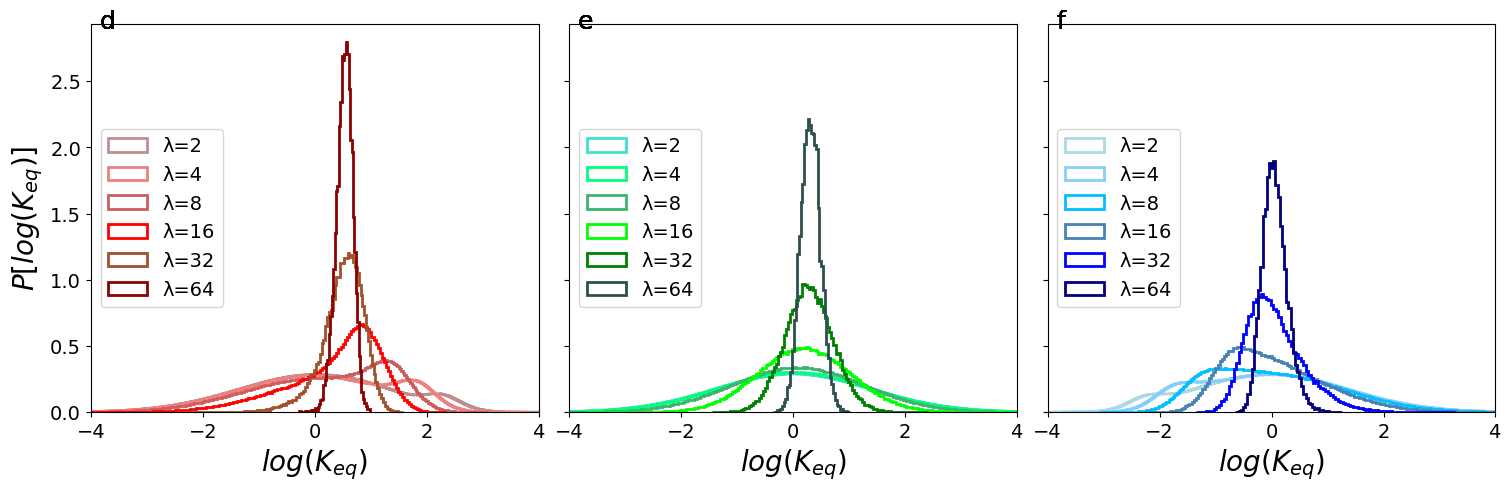

In [25]:
### Probaboility density funtion ###

scale_col = [["rosybrown","lightcoral","indianred","red","sienna","darkred"], 
             ["turquoise", "springgreen", "mediumseagreen", "lime", "green", "darkslategrey"],
             ["lightblue", "lightskyblue", "deepskyblue", "steelblue", "blue", "navy"]]

scalesHist = [2,4,8,16,32,64]
xTheo = np.linspace(-3, 3, 500)

nseeds = 128

conDir = ['./3d_256L_128r/3dcon/', './3d_256L_128r/3dint/', './3d_256L_128r/3ddis/']
stCon = ['HCS', 'ICS', 'LCS']
varDir = ['0.5/', '1/', '2/']
varSim = [0.5, 1, 2]

num = [['a','b','c'],['d','e','f'], ['d','e','f']]

ylim = ([0,2.75], [0,2.75], [0,2.75])
xlim = ([-2,2], [-4,4], [-4,4])
xy = [(-1.5,2.3), (-1.5, 2.0), (-1.5, 1.7), (-1.5, 1.4), (-1.5, 1.1)]

xnum = [-1.9, -3.85, -3.85]
ynum = [5, 3.9, 2.9]

for ivar in range(len(varDir)):
    fig, ax = plt.subplots(1, 3, sharey=True, layout='constrained')
    fig.set_figwidth(15)
    rdir2 = varDir[ivar]
    for icon in range(len(conDir)):
        rdir1 = conDir[icon]
        for iscale in range(len(scalesHist)):
            scale = scalesHist[iscale]
            keff = np.array([])
            for iseed in range(nseeds):
                if scale == 1:
                    aux = np.load(rdir1+rdir2+str(iseed)+'/k.npy').reshape(-1)
                    keff = np.append(keff, aux)
                else:
                    aux = np.load(rdir1+rdir2+str(iseed)+'/KpostProcess/Kperm'+str(scale)+'.npy').reshape(-1)
                    aux = aux[aux>0]
                    aux = aux[~np.isnan(aux)]
                    keff = np.append(keff, aux)
                
            ax[icon].hist(np.log(keff), bins='scott', density=True, histtype='step', label='\u03BB'+'='+str(scale), linewidth=2, 
                color=scale_col[icon][iscale])
            #ax[icon].set_title(num[ivar][icon], fontsize=18, loc='left', weight='bold')
            #ax[icon].set_title(stCon[icon]+', '+r"$\sigma^2_{Y}$"+' = '+str(varSim[ivar]), fontsize=16, loc='center')
            ax[icon].set_xlabel(r'$log(K_{eq})$', fontsize=20)
            ax[0].set_ylabel(r'$P[log(K_{eq})]$', fontsize=20)
            ax[icon].tick_params(axis='both', labelsize=14)
            ax[icon].set_xlim(xlim[ivar])
            #ax[icon].set_ylim(ylim[ivar])
            ax[icon].legend(fontsize=14, frameon=True, loc='center left')
            ax[icon].text(xnum[ivar], ynum[ivar], num[ivar][icon], style='normal', fontsize=18)
            
            #ax[0].annotate('\u03BB'+'='+str(64), xy=(0.21,3), xytext=(1.25,3.5), arrowprops=dict(arrowstyle="->", facecolor='black'), fontsize=15)
            #ax[0].annotate('\u03BB'+'='+str(2), xy=(1.3,0.15), xytext=(1.5,0.75), arrowprops=dict(arrowstyle="->", facecolor='black'), fontsize=15)
            
            #ax[0].text(0.25, 2, '\u03BB'+'='+str(scalesHist[4]))
            #ax[icon].set_ylim(0,2.6)
            # ax[icon].set_yscale('log')
            #ax[ivar].tick_params(axis='both', labelsize=fontsize)
            #fig.savefig('2D_PDF_'+stCon[icon] +'.png', format='png', dpi=300, bbox_inches='tight')

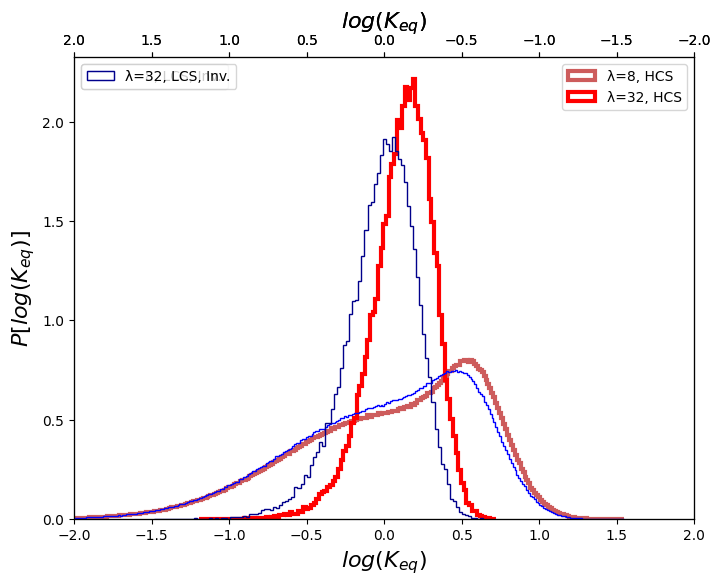

In [6]:
### Comparison of 3D HCS and LCS PDF reflections ####

scale_col_HCS = ["indianred","red"]
scale_col_LCS = ["blue","darkblue"]

scalesHist = [8, 32]
xTheo = np.linspace(-3, 3, 500)

conDir = ['./3d/3dcon/']#, './2d_1024L_128r/2ddis_128/']
stCon = ['HCS', 'LCS']
varDir = ['0.5/']
varSim = [0.5]
for ivar in range(len(varDir)):
    rdir2 = varDir[ivar]
    fig, ax1 = plt.subplots(figsize=(8,6))
    for icon in range(len(conDir)):
        rdir1 = conDir[icon]
        for iscale in range(len(scalesHist)):
            scale = scalesHist[iscale]
            keff = np.array([])
            for iseed in range(nseeds):
                if scale == 1:
                    aux = np.load(rdir1+rdir2+str(iseed)+'/k.npy').reshape(-1)
                    keff = np.append(keff, aux)
                else:
                    aux = np.load(rdir1+rdir2+str(iseed)+'/KpostProcess/Kperm'+str(scale)+'.npy').reshape(-1)
                    aux = aux[aux>0]
                    aux = aux[~np.isnan(aux)]
                    keff = np.append(keff, aux)
            ax1.hist(np.log(keff), bins='scott', density=True, histtype='step', label='\u03BB'+'='+str(scale)+', '+stCon[0], linewidth=3, 
                color=scale_col_HCS[iscale])
            ax1.set_xlim(-2,2)
            ax1.set_xlabel(r'$log(K_{eq})$', fontsize=16)
            ax1.set_ylabel(r'$P[log(K_{eq})]$', fontsize=16)
    
conDir = ['./3d/3ddis/']
stCon = ['LCS']
for ivar in range(len(varDir)):
    rdir2 = varDir[ivar]
    #fig, ax1 = plt.subplots(figsize=(8,6))
    for icon in range(len(conDir)):
        rdir1 = conDir[icon]
        for iscale in range(len(scalesHist)):
            scale = scalesHist[iscale]
            keff = np.array([])
            for iseed in range(nseeds):
                if scale == 1:
                    aux = np.load(rdir1+rdir2+str(iseed)+'/k.npy').reshape(-1)
                    keff = np.append(keff, aux)
                else:
                    aux = np.load(rdir1+rdir2+str(iseed)+'/KpostProcess/Kperm'+str(scale)+'.npy').reshape(-1)
                    aux = aux[aux>0]
                    aux = aux[~np.isnan(aux)]
                    keff = np.append(keff, aux)
                    
            ax2 = ax1.twiny()
            ax2.hist(np.log(keff), bins='scott', density=True, histtype='step', label='\u03BB'+'='+str(scale)+', '+stCon[0]+', '+'Inv.', linewidth=1, 
                color=scale_col_LCS[iscale])
            ax2.set_xlim(-2,2)
            ax2.invert_xaxis()
            ax2.set_xlabel(r'$log(K_{eq})$', fontsize=16)
            ax1.legend()
            ax2.legend(loc = 'upper left')

            #plt.savefig('3D_hist_inv_esc 16.png', format='png', dpi=300, bbox_inches='tight')

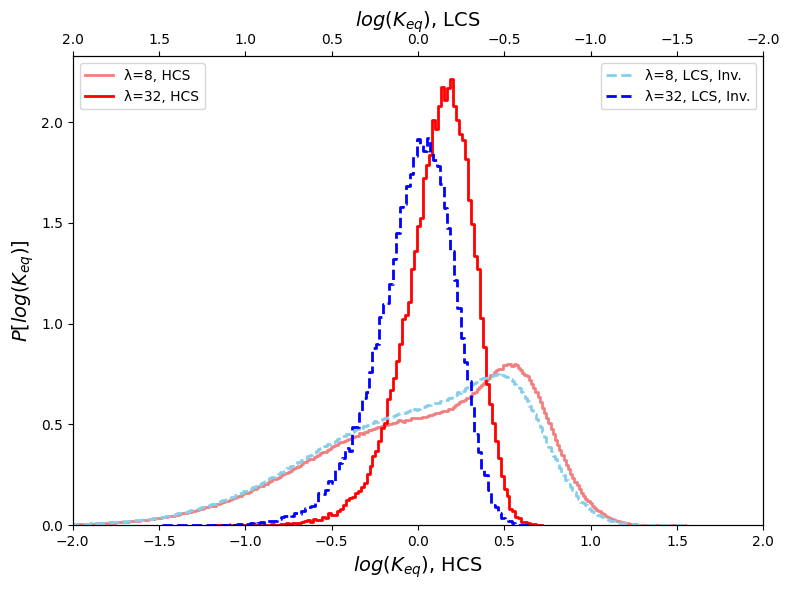

In [6]:
### Comparison of 3D HCS and LCS PDF reflections ####

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

scale_col_HCS = ['lightcoral', 'red'] 
scale_col_LCS = ['skyblue', 'blue'] 

scalesHist = [8, 32]
xTheo = np.linspace(-3, 3, 500)
nseeds = 128
varDir = ['0.5/']
varSim = [0.5]

conDirs = [['./3d/3dcon/', 'HCS', scale_col_HCS], ['./3d/3ddis/', 'LCS', scale_col_LCS]]

for ivar, rdir2 in enumerate(varDir):
    fig, ax1 = plt.subplots(figsize=(8, 6))
    ax2 = ax1.twiny()
    for rdir1, stCon, scale_colors in conDirs:
        for scale, color in zip(scalesHist, scale_colors):
            keff = []
            for iseed in range(nseeds):
                file_path = f"{rdir1}{rdir2}{iseed}/"
                if scale == 1:
                    aux = np.load(file_path + 'k.npy').reshape(-1)
                else:
                    aux = np.load(file_path + f'KpostProcess/Kperm{scale}.npy').reshape(-1)
                    aux = aux[aux > 0]
                    aux = aux[~np.isnan(aux)]
                keff.extend(aux)

            log_keff = np.log(keff)
            if stCon == 'HCS':
                sns.histplot(log_keff, bins='scott', fill=False, alpha=1, kde=False, stat="density", linestyle='-', 
                             element="step", label=f'\u03BB={scale}, {stCon}', linewidth=2, color=color, ax=ax1)
            else:
                sns.histplot(log_keff, bins='scott', fill=False, alpha=1, kde=False, stat="density", linestyle='--', 
                             element="step", label=f'\u03BB={scale}, {stCon}, Inv.', linewidth=2, color=color, ax=ax2)
                ax2.set_xlim(-2, 2)
                ax2.invert_xaxis()
                
    ax1.legend(loc='upper left', fontsize=10)
    ax2.legend(loc='upper right',fontsize=10)

    ax1.set_xlim(-2, 2)
    ax1.set_ylabel(r'$P[log(K_{eq})]$', fontsize=14)
    ax1.set_xlabel(r'$log(K_{eq})$' + ', HCS', fontsize=14)
    ax2.set_xlabel(r'$log(K_{eq})$' + ', ' + stCon, fontsize=14)
    
    plt.tight_layout()
    plt.show()

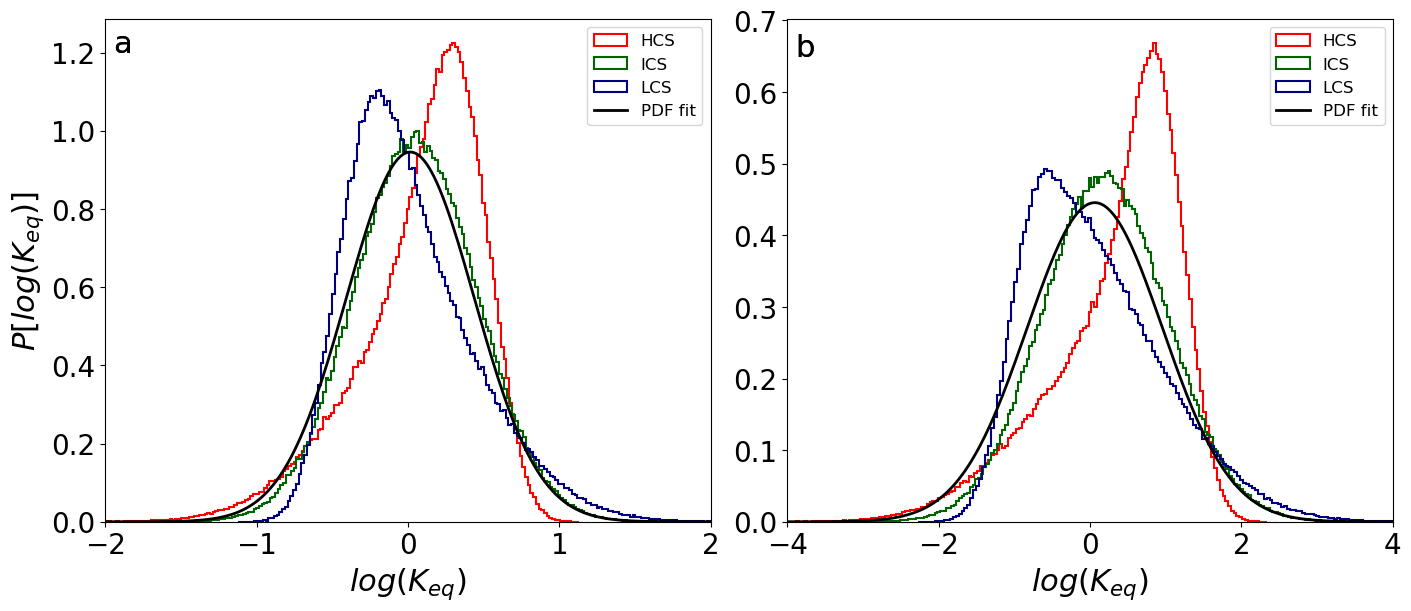

In [14]:
### Probability density function with skewness comparission ####

scalesHist = [32,64,128,256]
xTheo = np.linspace(-5, 5, 500)
scaleGraf = 16

color = ['red','darkgreen','navy']

varDir = ['0.5/', '2/']
varSim = [0.5, 2] 


fig, ax = plt.subplots(1, 2, figsize=(14,6), layout="constrained")

xlim_sk = ([-2,2], [-4,4])
ylim_sk = ([0,1.5], [0,0.5])
num = ('a','b')

for ivar in range(len(varDir)):
    rdir2 = varDir[ivar]
    for icon in range(len(conDir)):
        rdir1 = conDir[icon]
        for iscale in range(len(scalesHist)):
            scale = scalesHist[iscale]
            keff = np.array([])
            for iseed in range(nseeds):
                aux = np.load(rdir1+rdir2+str(iseed)+'/KpostProcess/Kperm'+str(scaleGraf)+'.npy').reshape(-1)
                aux = aux[aux>0]
                aux = aux[~np.isnan(aux)]
                keff = np.append(keff, aux)
           
        ax[ivar].hist(np.log(keff), bins='scott', density=True, histtype='step', label=stCon[icon], linewidth=1.5, color=color[icon])
        ax[ivar].legend(fontsize=16)
        #ax[ivar].set_title(stCon[icon]+', '+r"$\sigma^2_{\log\ K_{eq}}$"+' = '+str(varSim[ivar])+', '+'\u03BB'+'='+str(scaleGraf), fontsize=fontsize)
        #ax[ivar].set_title(num[ivar], fontsize=22, loc='left', weight='bold')
        #ax[ivar].set_title(r"$\sigma^2_{\log\ K_{eq}}$"+' = '+str(varSim[ivar]), fontsize=20, loc='center')
        ax[ivar].set_xlabel(r'$log(K_{eq})$', fontsize=22)
        ax[0].set_ylabel(r'$P[log(K_{eq})]$', fontsize=22)
        ax[ivar].tick_params(axis='both', labelsize=20)
        #ax[ivar].set_ylim(0,1)
        #ax[ivar].set_xlim(-4,4)
        ax[ivar].set_xlim(xlim_sk[ivar])
        #ax[ivar].set_ylim(ylim_sk[ivar])
        
        #ax[ivar].set_yticks([])
        
    PDF = 1/(np.sqrt(2*np.pi*np.var(np.log(keff)))) * np.exp(-(xTheo-np.mean(np.log(keff)))**2/(2*np.var(np.log(keff))))
    ax[ivar].plot(xTheo, PDF, color='black', linewidth=2, label='PDF fit', linestyle='-')
    ax[ivar].legend(fontsize=12)
    ax[0].text(-1.95, 1.2, 'a', style='normal', fontsize=22)
    ax[1].text(-3.9, 0.65, 'b', style='normal', fontsize=22)
    #ax[ivar].legend(fontsize=16, frameon=True)
    #fig.savefig('2D_PDF_skewComp.png', format='png', dpi=300, bbox_inches='tight')

/tmp/ipykernel_27442/3734402585.py:31: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keff[iscale] = np.nanvar(np.log(aux))


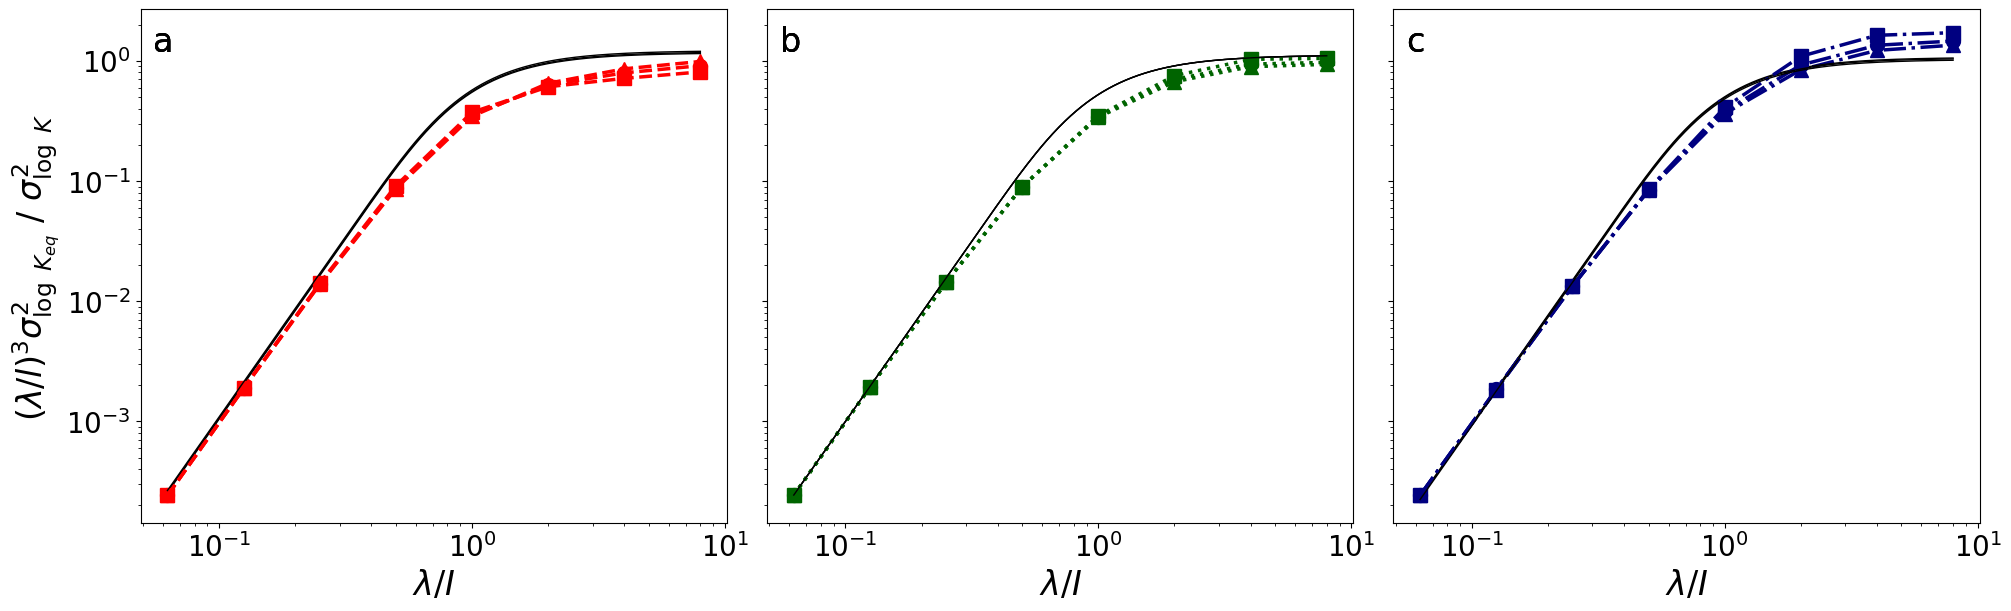

In [39]:
### Normalized Variance ###

fig, ax =plt.subplots(1,3, sharey=True, figsize=(20,6), layout='constrained')

scaleAtt = np.linspace(1,128,1000)

num=['a', 'b', 'c']

nseeds=128

for ivar in range(len(varDir)):
    rdir2 = varDir[ivar]
    for icon in range(len(conDir)):
        rdir1 = conDir[icon]
        keff = np.zeros(len(scales))
        for iscale in range(len(scales)):
            scale = scales[iscale]
            aux = np.array([])
            for iseed in range(nseeds):
                if scale == 1:
                    aux = np.load(rdir1+rdir2+str(iseed)+'/k.npy').reshape(-1)
                # elif iscale == len(scales)-1:
                #     aux = np.append(aux, np.loadtxt(rdir1+rdir2+str(iseed)+'/SolverRes.txt')[0])
                else:
                    try:
                        aux = np.append(aux, np.load(rdir1+rdir2+str(iseed)+'/KpostProcess/Kperm'+str(scale)+'.npy').reshape(-1))
                        aux = aux[aux>0]
                        aux = aux[~np.isnan(aux)]
                    except:
                        pass
            keff[iscale] = np.nanvar(np.log(aux))
            
        ax[icon].loglog(scales/lc, ((scales/lc)**3)*keff/varFG[icon][ivar], color=color[icon], marker=marker[ivar], linestyle=linestyle[icon], 
        linewidth=2.5, markersize=10, fillstyle='full', label=r'$\sigma^2_{Y}$'+' = '+ str(varSim[ivar]))
        #ax[icon].set_title('Normalized Variance'+', '+stCon[icon], fontsize=20)
        ax[icon].set_xlabel(r'$\lambda / I$', fontsize=24)
        ax[0].set_ylabel(r"$(\lambda / l)^3\sigma^2_{\log\ K_{eq}}\ /\ \sigma^2_{\log\ K}$",fontsize=24)
        ax[icon].tick_params(axis='both', labelsize=20)
        #ax[icon].legend(fontsize=14, frameon=True)
        ax[icon].text(0.055, 1.2, num[icon], style='normal', fontsize=24)
        
        #ax[icon].set_title(num[icon], fontsize=18, loc='left', weight='bold')
        #ax[icon].set_title(stCon[icon], fontsize=16, loc='center')
        
        ax[icon].loglog(scaleAtt/lc, ((scaleAtt/lc)**3)*attinger_var(varFG[icon][ivar], scaleAtt, 1.3, lc, kgFG[icon][ivar])/
            varFG[icon][ivar], label='Analytical', color='black', linewidth=1, linestyle='-')

/tmp/ipykernel_68143/4000861884.py:31: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keff[iscale] = np.nanvar(np.log(aux))


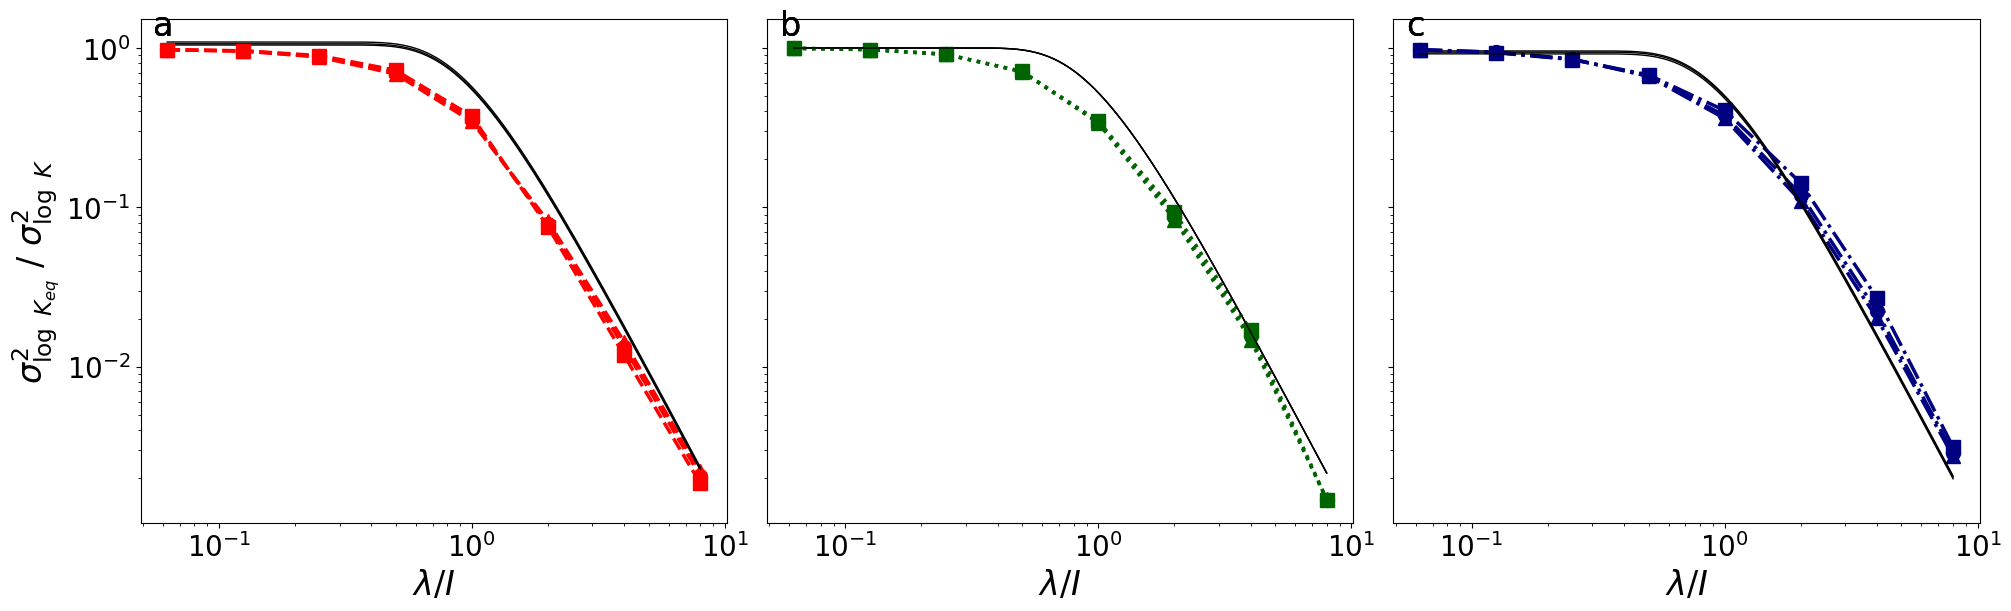

In [7]:
### 3D Variance ###

fig, ax =plt.subplots(1,3, sharey=True, figsize=(20,6), layout='constrained')

scaleAtt = np.linspace(1,128,1000)

num=['a', 'b', 'c']

nseeds=5

for ivar in range(len(varDir)):
    rdir2 = varDir[ivar]
    for icon in range(len(conDir)):
        rdir1 = conDir[icon]
        keff = np.zeros(len(scales))
        for iscale in range(len(scales)):
            scale = scales[iscale]
            aux = np.array([])
            for iseed in range(nseeds):
                if scale == 1:
                    aux = np.load(rdir1+rdir2+str(iseed)+'/k.npy').reshape(-1)
                # elif iscale == len(scales)-1:
                #     aux = np.append(aux, np.loadtxt(rdir1+rdir2+str(iseed)+'/SolverRes.txt')[0])
                else:
                    try:
                        aux = np.append(aux, np.load(rdir1+rdir2+str(iseed)+'/KpostProcess/Kperm'+str(scale)+'.npy').reshape(-1))
                        aux = aux[aux>0]
                        aux = aux[~np.isnan(aux)]
                    except:
                        pass
            keff[iscale] = np.nanvar(np.log(aux))
            
        ax[icon].loglog(scales/lc, keff/varFG[icon][ivar], color=color[icon], marker=marker[ivar], linestyle=linestyle[icon], 
        linewidth=2.5, markersize=10, fillstyle='full', label=r'$\sigma^2_{Y}$'+' = '+ str(varSim[ivar]))
        #ax[icon].set_title('Normalized Variance'+', '+stCon[icon], fontsize=20)
        ax[icon].set_xlabel(r'$\lambda / I$', fontsize=24)
        ax[0].set_ylabel(r"$\sigma^2_{\log\ K_{eq}}\ /\ \sigma^2_{\log\ K}$",fontsize=24)
        ax[icon].tick_params(axis='both', labelsize=20)
        #ax[icon].legend(fontsize=14, frameon=True)
        ax[icon].text(0.055, 1.2, num[icon], style='normal', fontsize=24)
        
        #ax[icon].set_title(num[icon], fontsize=18, loc='left', weight='bold')
        #ax[icon].set_title(stCon[icon], fontsize=16, loc='center')
        
        ax[icon].loglog(scaleAtt/lc, attinger_var(varFG[icon][ivar], scaleAtt, 1.3, lc, kgFG[icon][ivar])/
            varFG[icon][ivar], label='Analytical', color='black', linewidth=1, linestyle='-')

/tmp/ipykernel_13822/2641241784.py:23: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keff[iscale] = np.nanvar(np.log(aux))


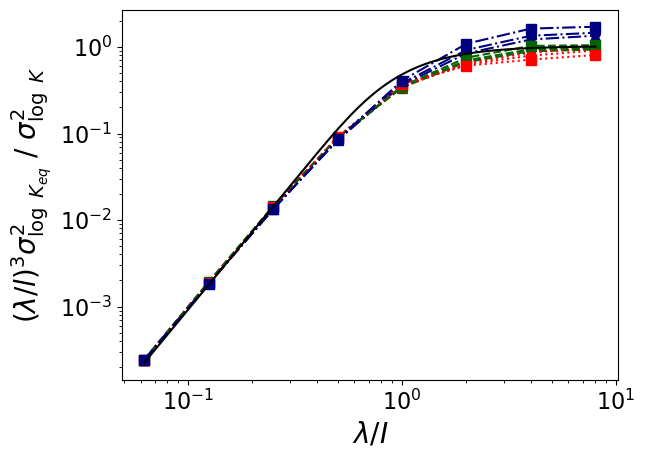

In [7]:
### Normalized Variance ###
nseeds = 128
for ivar in range(len(varDir)):
    rdir2 = varDir[ivar]
    for icon in range(len(conDir)):
        rdir1 = conDir[icon]
        keff = np.zeros(len(scales))
        for iscale in range(len(scales)):
            scale = scales[iscale]
            aux = np.array([])
            for iseed in range(nseeds):
                if scales[iscale] == 1:
                    aux = np.load(rdir1+rdir2+str(iseed)+'/k.npy').reshape(-1)
                # elif iscale == len(scales)-1:
                #     aux = np.append(aux, np.loadtxt(rdir1+rdir2+str(iseed)+'/SolverRes.txt')[0])
                else:
                    try:
                        aux = np.append(aux, np.load(rdir1+rdir2+str(iseed)+'/KpostProcess/Kperm'+str(scale)+'.npy').reshape(-1))
                        aux = aux[aux>0]
                        aux = aux[~np.isnan(aux)]
                    except:
                        pass
            keff[iscale] = np.nanvar(np.log(aux))
            
        plt.loglog(scales/lc, ((scales/lc)**3)*keff/varFG[icon][ivar], color=color[icon], marker=marker[ivar], linestyle=linestyle[icon], 
        linewidth=1.5, markersize=7, fillstyle='full', label=r'$\sigma^2_{Y}$'+' = '+ str(varSim[ivar]))
        #plt.title('Normalized Variance')
        plt.xlabel(r'$\lambda / I$', fontsize=20)
        plt.ylabel(r"$(\lambda / l)^3\sigma^2_{\log\ K_{eq}}\ /\ \sigma^2_{\log\ K}$",fontsize=20)
        plt.tick_params(axis='both', labelsize=16)
plt.loglog(scaleAtt/lc, ((scaleAtt/lc)**3)*attinger_var(varFG[icon][ivar], scaleAtt, 1.3, lc, kgFG[icon][ivar])/
varFG[icon][ivar], label='Analytical', color='black', linewidth=1.5, linestyle='-')
#plt.legend(fontsize=14, frameon=True)
#plt.savefig('2D_var.png', format='png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
### Skewness #### ....paralelizar....

from scipy.stats import skew


nseeds = 128
markerfill = ['full', 'none', 'top']
marker_skew = ['^', 'o', 's']

num = ['a', 'b', 'c']

# conDir = ['./2dint/', './2dcon/', './2ddis/']
# varDir = ['0.5/', '1/', '2/'] 
# varSim = [0.5, 1, 2] 


for ivar in range(len(varDir)):
    rdir2 = varDir[ivar]
    for icon in range(len(conDir)):
        rdir1 = conDir[icon]
        skewness = np.zeros(len(scales))
        for iscale in range(len(scales)):
            scale = scales[iscale]
            aux = np.array([])
            for iseed in range(nseeds):
                if scales[iscale] == 1:
                    aux = np.load(rdir1+rdir2+str(iseed)+'/k.npy').reshape(-1)
                elif iscale == len(scales)-1:
                    aux = np.append(aux, np.loadtxt(rdir1+rdir2+str(iseed)+'/SolverRes.txt')[0])
                else:
                    try:
                        aux = np.append(aux, np.load(rdir1+rdir2+str(iseed)+'/KpostProcess/Kperm'+str(scale)+'.npy').reshape(-1))
                        aux = aux[aux>0]
                        aux = aux[~np.isnan(aux)]
                    except:
                        pass
            skewness[iscale] = skew(np.log(aux))
            #print(skewness)
            #print(skewness, skewness.shape)
        plt.semilogx(scales/lc, skewness, color=color[icon], marker=marker_skew[ivar], markersize=8, fillstyle=markerfill[ivar], 
            label=r'$\sigma^2_{Y}$'+' = '+ str(varSim[ivar]), linestyle='none')
        #ax[icon].set_title('Skewness'+', '+stCon[icon], fontsize=fontsize)
        plt.xlabel(r'$\lambda / I$', fontsize=20)
        plt.ylabel(r"$\gamma_{\log\ (K_{eq})}  $",fontsize=20)
        plt.tick_params(axis='both', labelsize=16)
        #plt.ylim(-1.25, 1.25)
plt.hlines(0, 0, 64, linestyle='--', color='black', linewidth=1)
plt.hlines(-1.068,0 , 64, linestyle='--', color='black', linewidth=1)
plt.hlines(0.84,0 , 64, linestyle='--', color='black', linewidth=1)
        


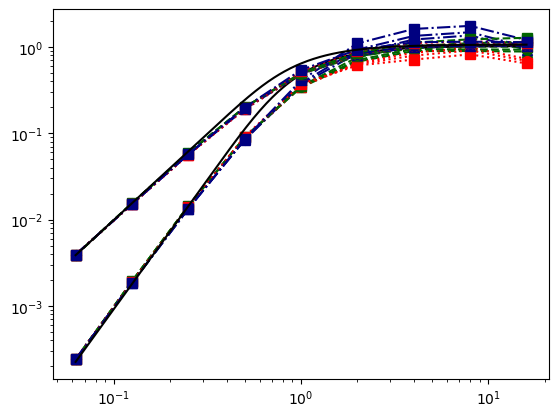

In [50]:
### Variance gran collapse ###
### 3D ###


nseeds = 64

lc = 16
con = [1,2,3]
varSim = [0.5, 1, 2] 

varDir3D = ['0.5/', '1/', '2/']
conDir3D = ['./3d_256L_128r/3dint/', './3d_256L_128r/3dcon/','./3d_256L_128r/3ddis/']

scales3D = np.array([1,2,4,8,16,32,64,128,256]) 
scaleAtt3D = np.linspace(1,256,1000)

def attinger_var3D(variance, scale, a, lc, Kg): #Attinger (Eq. 3.2.3, Boschan & Noetinger 2012)
    var_scale = Kg**2 * variance * (erf ((lc*a)/(np.sqrt(2)*scale)))**3
    return var_scale

for ivar in range(len(varDir3D)):
    rdir2 = varDir3D[ivar]
    for icon in range(len(conDir3D)):
        rdir1 = conDir3D[icon]
        keff = np.zeros(len(scales3D))
        for iscale in range(len(scales3D)):
            scale = scales3D[iscale]
            aux = np.array([])
            for iseed in range(nseeds):
                if scales3D[iscale] == 1:
                    aux = np.load(rdir1+rdir2+str(iseed)+'/k.npy').reshape(-1)
                elif scales3D[iscale] == 256:
                    aux = np.append(aux, np.loadtxt(rdir1+rdir2+str(iseed)+'/SolverRes.txt')[0])
                else:
                    try:
                        aux = np.append(aux, np.load(rdir1+rdir2+str(iseed)+'/KpostProcess/Kperm'+str(scale)+'.npy').reshape(-1))
                        aux = aux[aux>0]
                        aux = aux[~np.isnan(aux)]
                    except:
                        pass
            keff[iscale] = np.nanvar(np.log(aux))
            
        plt.loglog(scales3D/lc, ((scales3D/lc)**3)*keff/varFG[icon][ivar], color=color[icon], marker=marker[ivar], linestyle=linestyle[icon], 
        linewidth=1.5, markersize=7, fillstyle='full', label=r'$\sigma^2_{Y}$'+' = '+ str(varSim[ivar]))
        #plt.title('Normalized Variance')
        #plt.xlabel(r'$\lambda / I$', fontsize=20)
        #plt.ylabel(r"$(\lambda / l)^3\sigma^2_{\log\ K_{eq}}\ /\ \sigma^2_{\log\ K}$",fontsize=20)
        #plt.tick_params(axis='both', labelsize=16)
plt.loglog(scaleAtt3D/lc, ((scaleAtt3D/lc)**3)*attinger_var3D(varFG[icon][ivar], scaleAtt3D, 1.3, lc, kgFG[icon][ivar])/
    varFG[icon][ivar], label='Analytical', color='black', linewidth=1.5, linestyle='-')

### 2D ###
conDir2D = ['./2d_1024L_128r/2dint_128/', './2d_1024L_128r/2dcon_128/', './2d_1024L_128r/2ddis_128/']
varDir2D = ['0.5/', '1/', '2/']


def attinger_var2D(variance, scale, a, lc, Kg): #Attinger (Eq. 3.2.3, Boschan & Noetinger 2012)
    var_scale = Kg**2 * variance * (erf ((lc*a)/(np.sqrt(2)*scale)))**2
    return var_scale

scales2D = np.array([1,2,4,8,16,32,64,128,256]) 
scaleAtt2D = np.linspace(1,256,1000)

k_FG = np.array([])
kg_FG = np.array([])
var_FG = np.array([])
for icon in range(len(conDir2D)):
    rdir1 = conDir2D[icon]
    k = np.array([])
    kg = np.array([])
    var = np.array([])
    for ivar in range(len(varDir2D)):
        rdir2 = varDir2D[ivar]
        k1 = np.array([])
        kg1 = np.array([])
        var1 = np.array([])
        for iseed in range(nseeds):
            aux = np.load(rdir1+rdir2+str(iseed)+'/k.npy').reshape(-1)
            k1 = np.append(k1, np.mean(aux))
            kg1 = np.append(kg1, np.exp(np.mean(np.log(aux))))
            var1 = np.append(var1, np.var(np.log(aux)))
            #print(k1, k1.shape)
        k = np.append(k, np.mean(k1))
        kg = np.append(kg, np.mean(kg1))
        var = np.append(var, np.mean(var1))
    k_FG = np.append(k_FG, k)
    kg_FG = np.append(kg_FG, kg)
    var_FG = np.append(var_FG, var)
k_FG = np.reshape(k_FG, (len(conDir),len(varDir)))
kg_FG = np.reshape(kg_FG, (len(conDir),len(varDir)))
var_FG = np.reshape(var_FG, (len(conDir),len(varDir)))

for ivar in range(len(varDir2D)):
    rdir2 = varDir2D[ivar]
    for icon in range(len(conDir2D)):
        rdir1 = conDir2D[icon]
        keff = np.zeros(len(scales2D))
        for iscale in range(len(scales2D)):
            scale = scales2D[iscale]
            aux = np.array([])
            for iseed in range(nseeds):
                if scales2D[iscale] == 1:
                    aux = np.load(rdir1+rdir2+str(iseed)+'/k.npy').reshape(-1)
                # elif iscale == len(scales)-1:
                #     aux = np.append(aux, np.loadtxt(rdir1+rdir2+str(iseed)+'/SolverRes.txt')[0])
                else:
                    try:
                        aux = np.append(aux, np.load(rdir1+rdir2+str(iseed)+'/KpostProcess/Kperm'+str(scale)+'.npy').reshape(-1))
                        aux = aux[aux>0]
                        aux = aux[~np.isnan(aux)]
                    except:
                        pass
            keff[iscale] = np.nanvar(np.log(aux))
            
        plt.loglog(scales2D/lc, ((scales2D/lc)**2)*keff/var_FG[icon][ivar], color=color[icon], marker=marker[ivar], linestyle=linestyle[icon], 
        linewidth=1.5, markersize=7, fillstyle='full', label=r'$\sigma^2_{Y}$'+' = '+ str(varSim[ivar]))
        #plt.title('Normalized Variance')
        #plt.xlabel(r'$\lambda / I$', fontsize=20)
        #plt.ylabel(r"$(\lambda / l)^2\sigma^2_{\log\ K_{eq}}\ /\ \sigma^2_{\log\ K}$",fontsize=20)
        #plt.tick_params(axis='both', labelsize=16)
plt.loglog(scaleAtt2D/lc, ((scaleAtt2D/lc)**2)*attinger_var2D(var_FG[icon][ivar], scaleAtt2D, 1.3, lc, kg_FG[icon][ivar])/
    var_FG[icon][ivar], label='Analytical', color='black', linewidth=1.5, linestyle='-')
        #plt.legend(fontsize=14, frameon=True)
#plt.savefig('2D_var.png', format='png', dpi=300, bbox_inches='tight')


plt.show()
plt.close()
